## Imports

In [64]:
# manipulação e análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn (modelos de ML, metricas, codificadores e padronizadores)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

## Informação da base de dados

In [65]:
# ref: https://www.kaggle.com/datasets/imgowthamg/car-price/data
data = pd.read_csv('carprice.csv')

In [66]:
# Alguns dados do dataset
print("Linhas, Características")
print(data.shape)

Linhas, Características
(205, 26)


In [67]:
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [68]:
# Características numéricas
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [69]:
# Verifica se há valores nulos
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Limpeza do dataset

In [70]:
data = data.drop(['CarName', 'car_ID'], axis=1)

## Gráficos

### Distribuição dos dados

In [71]:
# Colunas numericas
numerical_columns = data.describe().columns

# Colunas categoricas
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

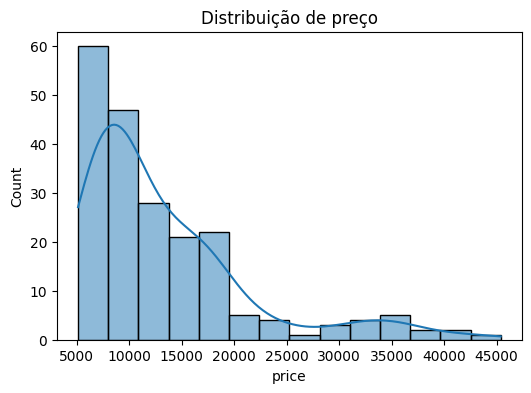

In [72]:
# Plotar histogramas e gráficos de densidade para cada característica numérica
plt.figure(figsize=(6, 4))
sns.histplot(data=data['price'], kde=True)
plt.title('Distribuição de preço')
plt.show()

### Correlação

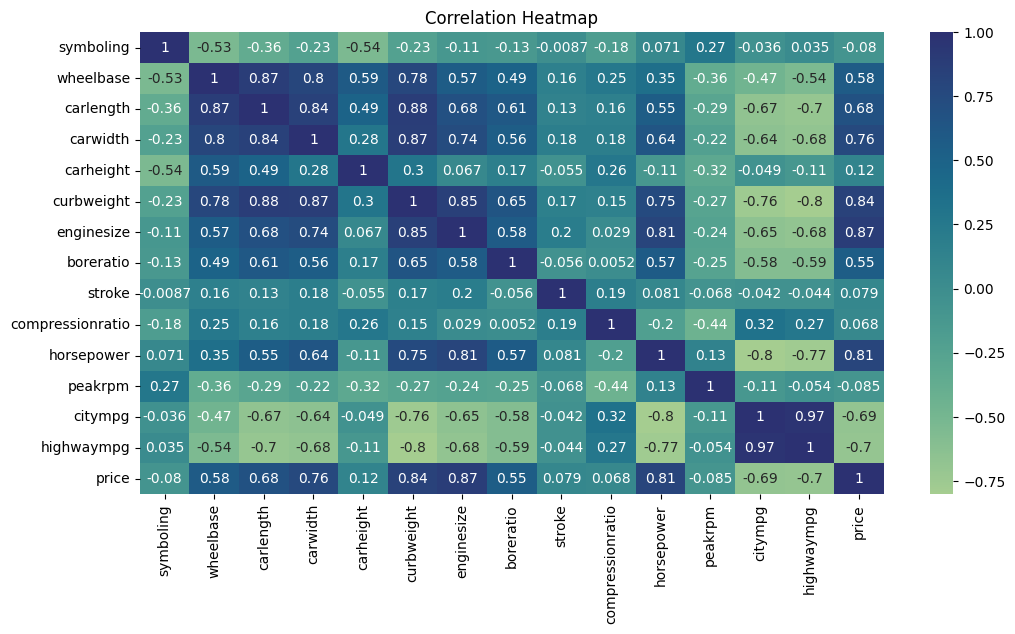

In [73]:
# Correlação das categorias númericas
plt.figure(figsize=(12, 6))
sns.heatmap(data[numerical_columns].corr(), cmap="crest", annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [74]:
# Seleção das correlações fortes
threshold = 0.6
correlation_matrix = data[numerical_columns].corr()
strong_corr_features = correlation_matrix.index[abs(correlation_matrix['price']) > threshold].tolist()

## Encoded das colunas (númericas e categoricas) e divisão do dataset (treino e teste)

In [75]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Feature scaling
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [76]:
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Inicialização dos modelos

In [77]:
regressor_linear = LinearRegression()

regressor_tree = DecisionTreeRegressor(
    max_depth=10,     # profundidade máxima da árvore
    min_samples_split=5,  # número mínimo de amostras necessárias para dividir um nó interno
    random_state=42   # controle da aleatoriedade para reproduzibilidade
)

regressor_forest = RandomForestRegressor(
    n_estimators=50,      # número de árvores na floresta
    max_depth=10,         # profundidade máxima da árvore (None para crescer até as folhas puras)
    min_samples_split=5,    # número mínimo de amostras necessárias para dividir um nó interno
    random_state=42         # controle da aleatoriedade para reproduzibilidade
)

In [78]:
# Criar o modelo StackingRegressor
estimators = [
    ('linear', regressor_linear),
    ('tree', regressor_tree),
    ('forest', regressor_forest),
]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42))

## Funções Auxiliares

In [79]:
# Função para avaliar os modelos
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

In [80]:
def predict_models():
    # Dicionário para armazenar os resultados dos modelos
    results = {
        'Model': [],
        'MAE': [],
        'MSE': [],
        'R²': []
    }

    # Previsões e avaliação
    models = {
        'Linear Regression': regressor_linear,
        'Decision Tree': regressor_tree,
        'Random Forest': regressor_forest,
        'Stacking Regressor': stacking_regressor
    }

    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        mae, mse, r2 = evaluate_model(y_test, y_pred)
        results['Model'].append(model_name)
        results['MAE'].append(mae)
        results['MSE'].append(mse)
        results['R²'].append(r2)

    # DataFrame com os resultados
    results_df = pd.DataFrame(results)
    print(results_df)

In [81]:
def train_models():
    regressor_linear.fit(X_train, y_train)
    regressor_tree.fit(X_train, y_train)
    regressor_forest.fit(X_train, y_train)
    stacking_regressor.fit(X_train, y_train)

## Treino & Predição

In [82]:
train_models()
predict_models()

                Model       MAE       MSE        R²
0   Linear Regression  0.317016  0.250611  0.798384
1       Decision Tree  0.252584  0.131439  0.894257
2       Random Forest  0.168594  0.057072  0.954086
3  Stacking Regressor  0.266385  0.232337  0.813085


## Rede Neural Linear (Perceptron)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 24        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 3.3889 - val_loss: 3.7921
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 2.9292 - val_loss: 3.2767
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 2.5367 - val_loss: 2.8122
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 2.1808 - val_loss: 2.4392
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 1.8851 - val_loss: 2.1166
Epoch 6/100
9/9 [==============================] - 0s 5ms/step

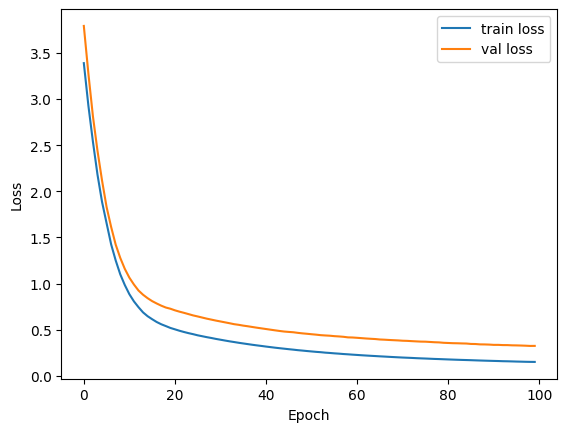

2/2 [==============================] - 0s 5ms/step
Mean Absolute Error (MAE): 0.39107595278614643
Mean Squared Error (MSE): 0.3167944071756901
R2 Score: 0.7451390153418518


In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Criando o modelo Sequential
model = Sequential()

# Adicionando uma camada densa (Perceptron)
model.add(Dense(1, input_dim=X_train.shape[1]))  # Apenas 1 neurônio na camada de saída para regressão linear

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Sumário do modelo
model.summary()

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=15, validation_split=0.2)

# Avaliando o modelo nos dados de teste
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Visualizando o treinamento
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Previsões
predictions = model.predict(X_test)

# Calculando e avaliando métricas
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')


In [84]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

# Definir e treinar o MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50, 50, 50, 50), max_iter=100, random_state=42)
mlp.fit(X_train, y_train)

# Fazer previsões
y_pred = mlp.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Mean Absolute Error (MAE): 0.27267765690863166
Mean Squared Error (MSE): 0.16897182795108318
R2 Score: 0.8640622262399431


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
